In [1]:
# import the libraries that will be used for this analysis
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# load the data and store the data into df variable
df = pd.read_csv('songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


According to above info, we know that there is no missing value in the dataset

Next, we will check if there is any duplicated values

In [4]:
#check the duplicated value
df.duplicated().value_counts()

False    1941
True       59
dtype: int64

In [5]:
# drop the duplicates
df.drop_duplicates(inplace=True)


In [6]:
# Set the artist colunm as the index of the dataframe
df.set_index('song', inplace = True)

In [7]:
#print out the head to check
df.head()

,artist,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
song,,,,,,,,,,,,,,,,,
Oops!...I Did It Again,Britney Spears,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
All The Small Things,blink-182,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
Breathe,Faith Hill,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
It's My Life,Bon Jovi,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
Bye Bye Bye,*NSYNC,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


I will deal with the colume of genre, since there are many differet genre for a song, I will split the genres and store the value in to new columns

In [8]:
#spilt the genere by using ','
df['genre'].str.split(',', expand = True)

,0,1,2,3
song,,,,
Oops!...I Did It Again,pop,None,None,None
All The Small Things,rock,pop,None,None
Breathe,pop,country,None,None
It's My Life,rock,metal,None,None
Bye Bye Bye,pop,None,None,None
...,...,...,...,...
Sucker,pop,None,None,None
Cruel Summer,pop,None,None,None
The Git Up,hip hop,country,None,None


In [9]:
#create more Gerenes columns to store different Grenes in a song
df['genre_1']=df['genre'].str.split(',', expand = True)[0]
df['genre_2']=df['genre'].str.split(',', expand = True)[1]
df['genre_3']=df['genre'].str.split(',', expand = True)[2]
df['genre_4']=df['genre'].str.split(',', expand = True)[3]
# print out the head to check
df.head()

,artist,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,genre,genre_1,genre_2,genre_3,genre_4
song,,,,,,,,,,,,,,,,,,,,,
Oops!...I Did It Again,Britney Spears,211160,False,2000,77,0.751,0.834,1,-5.444,0,...,0.3000,0.000018,0.3550,0.894,95.053,pop,pop,None,None,None
All The Small Things,blink-182,167066,False,1999,79,0.434,0.897,0,-4.918,1,...,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",rock,pop,None,None
Breathe,Faith Hill,250546,False,1999,66,0.529,0.496,7,-9.007,1,...,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",pop,country,None,None
It's My Life,Bon Jovi,224493,False,2000,78,0.551,0.913,0,-4.063,0,...,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",rock,metal,None,None
Bye Bye Bye,*NSYNC,200560,False,2000,65,0.614,0.928,8,-4.806,0,...,0.0408,0.001040,0.0845,0.879,172.656,pop,pop,None,None,None


Next, I will check if any process can be done for 'year' colume

In [10]:
# Get the description of year first.
df['year'].describe()

count    1941.000000
mean     2009.520350
std         5.875532
min      1998.000000
25%      2004.000000
50%      2010.000000
75%      2015.000000
max      2020.000000
Name: year, dtype: float64

In [11]:
# according to above status, we can creat following bins
bins = np.linspace(start=1995, stop=2020, num=6)
bins

array([1995., 2000., 2005., 2010., 2015., 2020.])

In [12]:
# Add one more column to store the value of year bins
df['year_bins'] = pd.cut(df['year'], bins)
df.head()

,artist,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,genre,genre_1,genre_2,genre_3,genre_4,year_bins
song,,,,,,,,,,,,,,,,,,,,,
Oops!...I Did It Again,Britney Spears,211160,False,2000,77,0.751,0.834,1,-5.444,0,...,0.000018,0.3550,0.894,95.053,pop,pop,None,None,None,"(1995.0, 2000.0]"
All The Small Things,blink-182,167066,False,1999,79,0.434,0.897,0,-4.918,1,...,0.000000,0.6120,0.684,148.726,"rock, pop",rock,pop,None,None,"(1995.0, 2000.0]"
Breathe,Faith Hill,250546,False,1999,66,0.529,0.496,7,-9.007,1,...,0.000000,0.2510,0.278,136.859,"pop, country",pop,country,None,None,"(1995.0, 2000.0]"
It's My Life,Bon Jovi,224493,False,2000,78,0.551,0.913,0,-4.063,0,...,0.000013,0.3470,0.544,119.992,"rock, metal",rock,metal,None,None,"(1995.0, 2000.0]"
Bye Bye Bye,*NSYNC,200560,False,2000,65,0.614,0.928,8,-4.806,0,...,0.001040,0.0845,0.879,172.656,pop,pop,None,None,None,"(1995.0, 2000.0]"


In [13]:
# check the value counts for each bins
df['year_bins'].value_counts()

(2010.0, 2015.0]    489
(2000.0, 2005.0]    479
(2005.0, 2010.0]    459
(2015.0, 2020.0]    404
(1995.0, 2000.0]    110
Name: year_bins, dtype: int64

In [14]:
#check who is the artist with most popular songs from the dataset
df['artist'].value_counts()

Drake             23
Rihanna           23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Big Tymers         1
DJ Sammy           1
Cam’ron            1
Mumford & Sons     1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

In [15]:
#check correlation between each columns
df.corr()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.119608,-0.318835,0.048140,-0.060083,-0.082982,-0.001353,-0.086226,-0.004095,0.062538,0.009960,-0.006409,0.022549,-0.116423,-0.033762
explicit,0.119608,1.000000,0.077361,0.047308,0.243799,-0.164212,0.001795,-0.091265,0.050653,0.415445,-0.028032,-0.082605,0.008238,-0.045397,0.014650
year,-0.318835,0.077361,1.000000,-0.007294,0.035444,-0.110265,0.008588,0.017228,-0.007208,0.003146,0.040698,-0.051490,-0.026418,-0.208410,0.077798
popularity,0.048140,0.047308,-0.007294,1.000000,-0.000143,-0.013404,0.013561,0.030441,-0.019430,0.021977,0.022501,-0.048104,-0.010291,-0.011012,0.011057
danceability,-0.060083,0.243799,0.035444,-0.000143,1.000000,-0.103204,0.035747,-0.035638,-0.068643,0.140955,-0.062374,0.021662,-0.127349,0.403787,-0.169074
energy,-0.082982,-0.164212,-0.110265,-0.013404,-0.103204,1.000000,-0.000642,0.651986,-0.044177,-0.058225,-0.447056,0.040662,0.153922,0.331756,0.152305
key,-0.001353,0.001795,0.008588,0.013561,0.035747,-0.000642,1.000000,-0.005229,-0.153319,0.003769,0.000719,-0.004053,-0.040827,0.035441,-0.009852
loudness,-0.086226,-0.091265,0.017228,0.030441,-0.035638,0.651986,-0.005229,1.000000,-0.027568,-0.081831,-0.312079,-0.103575,0.101972,0.228250,0.081655
mode,-0.004095,0.050653,-0.007208,-0.019430,-0.068643,-0.044177,-0.153319,-0.027568,1.000000,0.002192,0.009210,-0.036433,0.028334,-0.080279,0.047445
speechiness,0.062538,0.415445,0.003146,0.021977,0.140955,-0.058225,0.003769,-0.081831,0.002192,1.000000,0.002926,-0.062401,0.056532,0.069247,0.063192


Some regression models of "popularity" and other factors for reference

<AxesSubplot:xlabel='duration_ms', ylabel='popularity'>

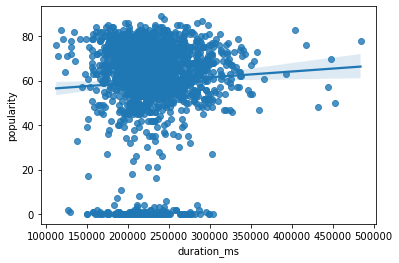

In [16]:
sns.regplot(x = "duration_ms", 
            y = "popularity", 
            data = df)

<AxesSubplot:xlabel='year', ylabel='popularity'>

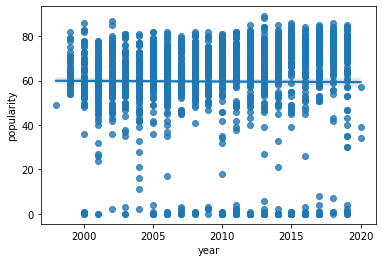

In [17]:
sns.regplot(x = "year", 
            y = "popularity", 
            data = df)

<AxesSubplot:xlabel='danceability', ylabel='popularity'>

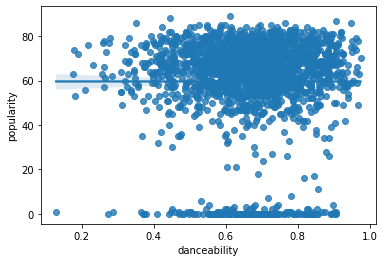

In [18]:
sns.regplot(x = "danceability", 
            y = "popularity", 
            data = df)

<AxesSubplot:xlabel='key', ylabel='popularity'>

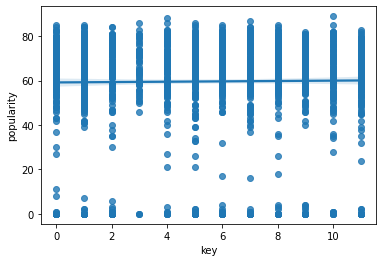

In [19]:
sns.regplot(x = "key", 
            y = "popularity", 
            data = df)

<AxesSubplot:xlabel='speechiness', ylabel='popularity'>

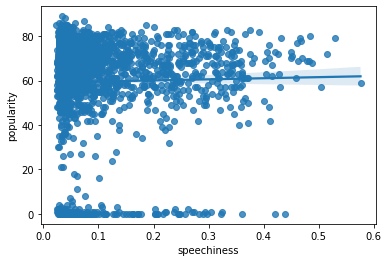

In [20]:
sns.regplot(x = "speechiness", 
            y = "popularity", 
            data = df)

<AxesSubplot:xlabel='instrumentalness', ylabel='popularity'>

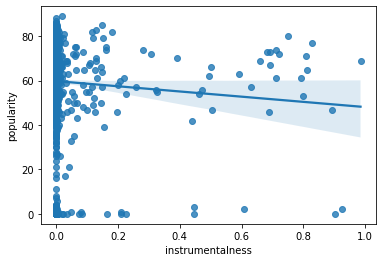

In [21]:
sns.regplot(x = "instrumentalness", 
            y = "popularity", 
            data = df)

<AxesSubplot:xlabel='liveness', ylabel='popularity'>

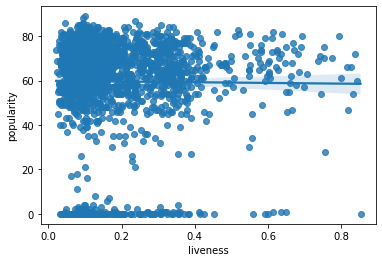

In [22]:
sns.regplot(x = "liveness", 
            y = "popularity", 
            data = df)